<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_train[0].shape

(28, 28)

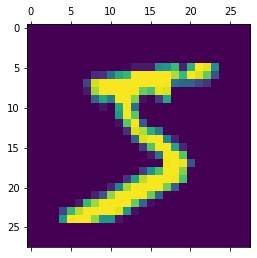

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<h3 style='color:purple'>Using ANN for classification</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2730 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1239 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0866 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0428 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0291 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 988us/step - loss: 0.0831 - accuracy: 0.9780


[0.0830635279417038, 0.9779999852180481]

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [ ]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1739 - accuracy: 0.9488
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0610 - accuracy: 0.9814
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0398 - accuracy: 0.9872
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0291 - accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0207 - accuracy: 0.9934


In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9843


[0.05414153262972832, 0.9843000173568726]